In [1]:
#Name: Mark McAfoose
#Student ID: 801149826
#Homework 0
#Github Link

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv('C:/Users/mcafo/Desktop/Housing.csv') # For some reason, putting this in its own folder won't read properly, so desktop it is
df.head() # To get first n rows from the dataset default value of n is 5
M=len(df)
M

545

In [4]:
Area = df.values[:, 1]
Bedrooms = df.values[:, 2]
Bathrooms = df.values[:, 3]
Stories = df.values[:, 4]
Parking = df.values[:, 10]
y = df.values[:, 0]
m = len(y)
print('Area = ', Area[: 5]) # Show only first 5 records
print('Bedrooms = ', Bedrooms[: 5]) # Show only first 5 records
print('Bathrooms = ', Bathrooms[: 5]) # Show only first 5 records
print('Stories = ', Stories[: 5])
print('Parking = ', Parking[: 5])
print('y = ', y[: 5])
print('m = ', m)

Area =  [7420 8960 9960 7500 7420]
Bedrooms =  [4 4 3 4 4]
Bathrooms =  [2 4 2 2 1]
Stories =  [3 4 2 2 2]
Parking =  [2 3 2 3 2]
y =  [13300000 12250000 12250000 12215000 11410000]
m =  545


In [5]:
p = np.ones((m,1))
p[:5]
Area = Area.reshape(m,1)
Bedrooms= Bedrooms.reshape(m,1)
Bathrooms = Bathrooms.reshape(m,1)
Storiess = Stories.reshape(m,1)
Parking = Parking.reshape(m,1)
X=np.hstack((p,Area))
theta=np.zeros(2)
theta
def compute_cost(X,y,theta):
    predictions = X.dot(theta)
    errors = np.subtract(predictions,y)
    sqrErrors=np.square(errors)
    J = 1/(2*m)*np.sum(sqrErrors)
    return J
cost=compute_cost(X,y,theta)
print('The cost for given values of theta_0 and theta_1 =',cost)
def gradient_descent(X, y, theta, alpha, iterations): #Gradient decent for first column
    cost_history=np.zeros(iterations)
    for i in range(iterations):
        prediction = X.dot(theta)
        errors = np.subtract(prediction,y)
        sum_delta = (alpha/m)*X.transpose().dot(errors);
        theta=theta-sum_delta;
        cost_history[i]=compute_cost(X,y,theta)
    
    return theta,cost_history
theta = [0.,0.]
iterations = 1500;
alpha = 0.00000001;   
theta, cost_history = gradient_descent(X,y,theta,alpha,iterations)
print('Final value of theta =',theta)
print('cost_history =',cost_history) 

The cost for given values of theta_0 and theta_1 = 13106916364659.268
Final value of theta = [5.531521705923398 855.7090394624015]
cost_history = [7.08082374e+12 4.23080872e+12 2.88290616e+12 ... 1.67338009e+12
 1.67338009e+12 1.67338009e+12]


Text(0.5, 1.0, 'Linear Regression for X1')

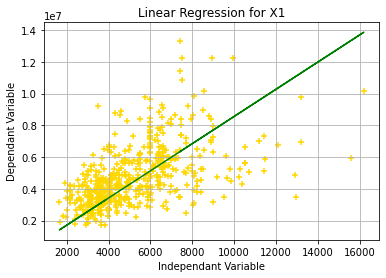

In [6]:
plt.scatter(X[:,1],y,color='gold',marker='+',label='Training Data')
plt.plot(X[:,1],X.dot(theta),color='green',label='Linear Regression')
plt.grid()
plt.rcParams["figure.figsize"]=(10,6)
plt.xlabel('Independant Variable')
plt.ylabel('Dependant Variable')
plt.title('Linear Regression for X1')

Text(0.5, 1.0, 'Convergence of gradient descent of first variable')

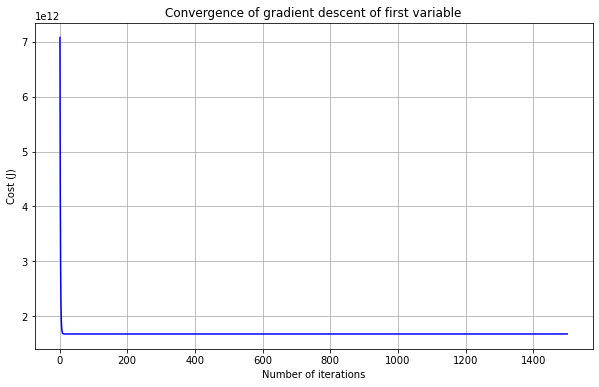

In [7]:
#gradient descent
plt.plot(range(1,iterations+1),cost_history,color='blue')
plt.rcParams["figure.figsize"]=(10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent of first variable')

In [8]:
Area = df.values[:, 1]
Bedrooms = df.values[:, 2]
Bathrooms = df.values[:, 3]
Stories = df.values[:, 4]
Mainroad = df.values[:, 5]
Guestroom = df.values[:, 6]
Basement = df.values[:, 7]
HotWaterHeating = df.values[:, 8]
AirConditioning = df.values[:, 9]
Parking = df.values[:, 10]
y = df.values[:, 0]
m = len(y)
print('Area = ', Area[: 5]) # Show only first 5 records
print('Bedrooms = ', Bedrooms[: 5]) # Show only first 5 records
print('Bathrooms = ', Bathrooms[: 5]) # Show only first 5 records
print('Stories = ', Stories[: 5])
print('Mainroad = ', Mainroad[: 5])
print('Guestroom = ', Guestroom[: 5])
print('Basement = ', Basement[: 5])
print('HotWaterHeating = ', HotWaterHeating[: 5])
print('AirConditioning = ', AirConditioning[: 5])
print('Parking = ', Parking[: 5])
print('y = ', y[: 5])
print('m = ', m)

Area =  [7420 8960 9960 7500 7420]
Bedrooms =  [4 4 3 4 4]
Bathrooms =  [2 4 2 2 1]
Stories =  [3 4 2 2 2]
Mainroad =  ['yes' 'yes' 'yes' 'yes' 'yes']
Guestroom =  ['no' 'no' 'no' 'no' 'yes']
Basement =  ['no' 'no' 'yes' 'yes' 'yes']
HotWaterHeating =  ['no' 'no' 'no' 'no' 'no']
AirConditioning =  ['yes' 'yes' 'no' 'yes' 'yes']
Parking =  [2 3 2 3 2]
y =  [13300000 12250000 12250000 12215000 11410000]
m =  545


In [9]:
p = np.ones((m,1))
p[:5]
Area = Area.reshape(m,1)
Bedrooms= Bedrooms.reshape(m,1)
Bathrooms = Bathrooms.reshape(m,1)
Stories = Stories.reshape(m,1)
Mainroad = Mainroad.reshape(m,1)
Guestroom = Guestroom.reshape(m,1)
Basement = Basement.reshape(m,1)
HotWaterHeating = HotWaterHeating.reshape(m,1)
AirConditioning = AirConditioning.reshape(m,1)
Parking = Parking.reshape(m,1)
X=np.hstack((p,Area))
theta=np.zeros(2)
theta
def compute_cost(X,y,theta):
    predictions = X.dot(theta)
    errors = np.subtract(predictions,y)
    sqrErrors=np.square(errors)
    J = 1/(2*m)*np.sum(sqrErrors)
    return J
cost=compute_cost(X,y,theta)
print('The cost for given values of theta_0 and theta_1 =',cost)
def gradient_descent(X, y, theta, alpha, iterations): #Gradient decent for first column
    cost_history=np.zeros(iterations)
    for i in range(iterations):
        prediction = X.dot(theta)
        errors = np.subtract(prediction,y)
        sum_delta = (alpha/m)*X.transpose().dot(errors);
        theta=theta-sum_delta;
        cost_history[i]=compute_cost(X,y,theta)
    
    return theta,cost_history
theta = [0.,0.]
iterations = 1500;
alpha = 0.00000001;   
theta, cost_history = gradient_descent(X,y,theta,alpha,iterations)
print('Final value of theta =',theta)
print('cost_history =',cost_history) 

The cost for given values of theta_0 and theta_1 = 13106916364659.268
Final value of theta = [5.531521705923398 855.7090394624015]
cost_history = [7.08082374e+12 4.23080872e+12 2.88290616e+12 ... 1.67338009e+12
 1.67338009e+12 1.67338009e+12]


Text(0.5, 1.0, 'Linear Regression for X1')

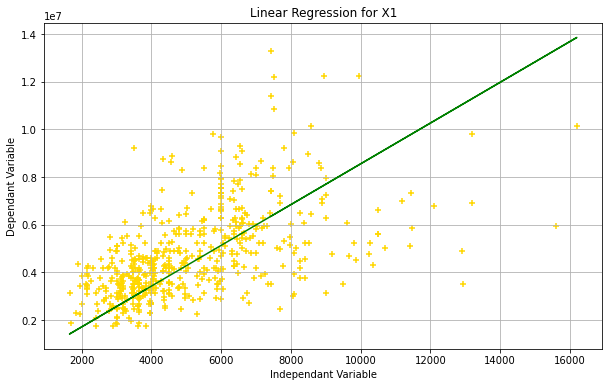

In [10]:
plt.scatter(X[:,1],y,color='gold',marker='+',label='Training Data')
plt.plot(X[:,1],X.dot(theta),color='green',label='Linear Regression')
plt.grid()
plt.rcParams["figure.figsize"]=(10,6)
plt.xlabel('Independant Variable')
plt.ylabel('Dependant Variable')
plt.title('Linear Regression for X1')

Text(0.5, 1.0, 'Convergence of gradient descent of first variable')

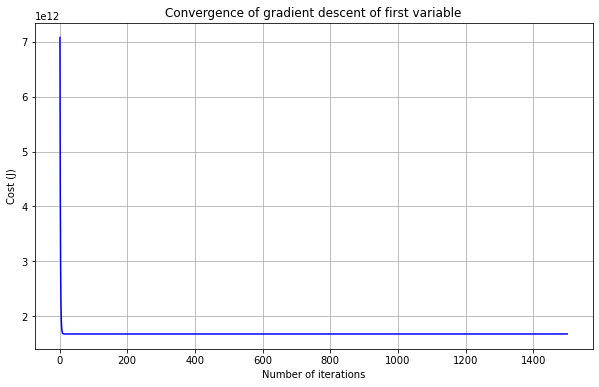

In [11]:
#gradient descent
plt.plot(range(1,iterations+1),cost_history,color='blue')
plt.rcParams["figure.figsize"]=(10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent of first variable')

In [12]:
housing = pd.DataFrame(pd.read_csv('C:/Users/mcafo/Desktop/Housing.csv'))
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [13]:
m = len(housing)
m

545

In [14]:
housing.shape

(545, 13)

In [15]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [16]:
housing.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [17]:
# You can see that your dataset has many columns with values as 'Yes' or 'No'.
# But in order to fit a regression line, we would need numerical values and not string.
# List of variables to map
varlist = ['Area', 'Bedrooms', 'Bathrooms', 'Stories', 'Parking',]
# Defining the map function
def binary_map(x):
    return x.map({'yes': 1, "no": 0})
# Applying the function to the housing list
housing[varlist] = housing[varlist].apply(binary_map)
# Check the housing dataframe now
housing.head()

KeyError: "None of [Index(['Area', 'Bedrooms', 'Bathrooms', 'Stories', 'Parking'], dtype='object')] are in the [columns]"

In [ ]:
#Splitting the Data into Training and Testing Sets
from sklearn.model_selection import train_test_split
# We specify this so that the train and test data set always have the same rows, respec
np.random.seed(0)
df_train, df_test = train_test_split(housing, train_size = 0.7, test_size = 0.3, random_state = 1)
df_train.shape

In [ ]:
df_test.shape

In [ ]:
num_vars=['area','bedrooms','bathrooms','stories','parking','price']
df_Newtrain=df_train[num_vars]
df_Newtest=df_test[num_vars]
df_Newtrain.head()

In [ ]:
df_Newtrain.shape

In [ ]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler,StandardScaler
scaler=MinMaxScaler()
df_Newtrain[num_vars]=scaler.fit_transform(df_Newtrain[num_vars])
df_Newtrain.head(20)

In [ ]:
y_Newtrain = df_Newtrain.pop('price')
X_Newtrain = df_Newtrain

In [ ]:
X_Newtrain.head()

In [ ]:
y_Newtrain.head()

In [ ]:
Y = y_Newtrain.values # get input values from first column
Y

In [ ]:
X0 = df_Newtrain.values[:, 0] # get input values from first column
X0